In [5]:
import pandas as pd

df = pd.read_csv('shopping_behavior_updated.csv')
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [6]:
# Data types

print("Data types:\n")
print(df.dtypes, "\n")

Data types:

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object 



In [7]:
# Checking for missing values

print("Missing values per column:\n")
print(df.isnull().sum(), "\n")

Missing values per column:

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64 



In [10]:
# Checking for duplicates
print("Checking for duplicates.")
duplicate_count = df.duplicated().sum()
print(f"→ Found {duplicate_count} duplicate rows")

if duplicate_count > 0:
        df = df.drop_duplicates()
        print(f"→ Removed {duplicate_count} duplicates")
else:
        print("→ No duplicates found")

Checking for duplicates...
→ Found 0 duplicate rows
→ No duplicates found


In [4]:
print("Summary statistics (numeric columns):\n")
print(df.describe().T)

Summary statistics (numeric columns):

                        count         mean          std   min     25%     50%  \
Customer ID            3900.0  1950.500000  1125.977353   1.0  975.75  1950.5   
Age                    3900.0    44.068462    15.207589  18.0   31.00    44.0   
Purchase Amount (USD)  3900.0    59.764359    23.685392  20.0   39.00    60.0   
Review Rating          3900.0     3.749949     0.716223   2.5    3.10     3.7   
Previous Purchases     3900.0    25.351538    14.447125   1.0   13.00    25.0   

                           75%     max  
Customer ID            2925.25  3900.0  
Age                      57.00    70.0  
Purchase Amount (USD)    81.00   100.0  
Review Rating             4.40     5.0  
Previous Purchases       38.00    50.0  


In [5]:
# Coverting dummy varibles Yes/No to 1/0

df = df.replace({'Yes': 1, 'No': 0})

# Show the first few rows to verify
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating  Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                    1   
1          Maine    L     Maroon  Winter            3.1                    1   
2  Massachusetts    S     Maroon  Spring            3.1                    1   
3   Rhode Island    M     Maroon  Spring            3.5                    1   
4         Oregon    M  Turquoise  Spring            2.7                    1   

   Shipping Type  Discount Applied  Promo Code Use

/tmp/ipython-input-8493959.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})


In [6]:
print("Summary statistics (numeric columns):\n")
print(df.describe().T)

Summary statistics (numeric columns):

                        count         mean          std   min     25%     50%  \
Customer ID            3900.0  1950.500000  1125.977353   1.0  975.75  1950.5   
Age                    3900.0    44.068462    15.207589  18.0   31.00    44.0   
Purchase Amount (USD)  3900.0    59.764359    23.685392  20.0   39.00    60.0   
Review Rating          3900.0     3.749949     0.716223   2.5    3.10     3.7   
Subscription Status    3900.0     0.270000     0.444016   0.0    0.00     0.0   
Discount Applied       3900.0     0.430000     0.495139   0.0    0.00     0.0   
Promo Code Used        3900.0     0.430000     0.495139   0.0    0.00     0.0   
Previous Purchases     3900.0    25.351538    14.447125   1.0   13.00    25.0   

                           75%     max  
Customer ID            2925.25  3900.0  
Age                      57.00    70.0  
Purchase Amount (USD)    81.00   100.0  
Review Rating             4.40     5.0  
Subscription Status       

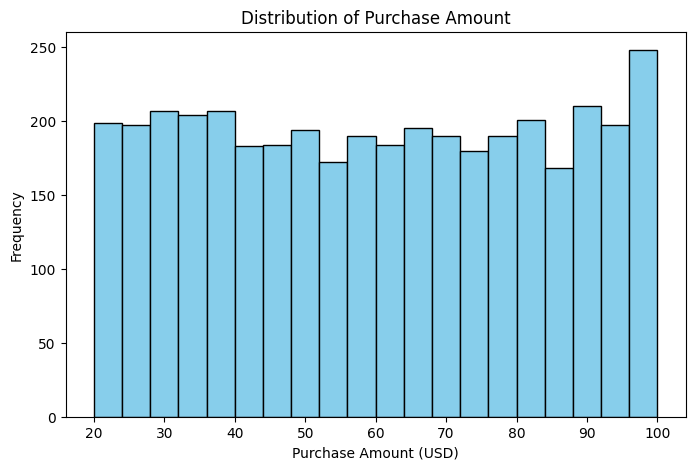

In [ ]:
# i) Histogram for Purchase Amount

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.hist(df["Purchase Amount (USD)"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.show()


In [52]:
# Drop non-informative columns
df = df.drop(columns=["Customer ID", "Promo Code Used"], errors="ignore")

In [53]:
# Create Age Groups (bins)

bins = [18, 25, 35, 45, 55, 70]
labels = ["18–25", "26–35", "36–45", "46–55", "56–70"]

df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

print("\nAge groups value counts:")
print(df["Age Group"].value_counts().sort_index())


Age groups value counts:
Age Group
18–25     502
26–35     742
36–45     729
46–55     753
56–70    1105
Name: count, dtype: int64


In [54]:
# Grouped dataset by Age Group

age_group_stats = (
    df.groupby("Age Group")
      .agg(
          n_customers=("Age", "count"),
          avg_age=("Age", "mean"),
          avg_purchase=("Purchase Amount (USD)", "mean"),
          avg_rating=("Review Rating", "mean"),
          avg_prev_purchases=("Previous Purchases", "mean"),
          discount_rate=("Discount Applied", "mean"),
          sub_rate=("Subscription Status", "mean")
      )
      .reset_index()
)

print("\nAge-group-level stats:")
print(age_group_stats)


Age-group-level stats:
  Age Group  n_customers    avg_age  avg_purchase  avg_rating  \
0     18–25          502  22.051793     60.739044    3.826096   
1     26–35          742  30.411051     59.760108    3.735175   
2     36–45          729  40.427984     59.305898    3.751029   
3     46–55          753  50.515272     60.583001    3.712085   
4     56–70         1105  62.877828     59.055204    3.750679   

   avg_prev_purchases  discount_rate  sub_rate  
0           25.129482       0.434263  0.270916  
1           24.760108       0.435310  0.264151  
2           25.170096       0.414266  0.263374  
3           25.419655       0.432935  0.304117  
4           26.192760       0.433484  0.258824  


/tmp/ipython-input-898438761.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age Group")


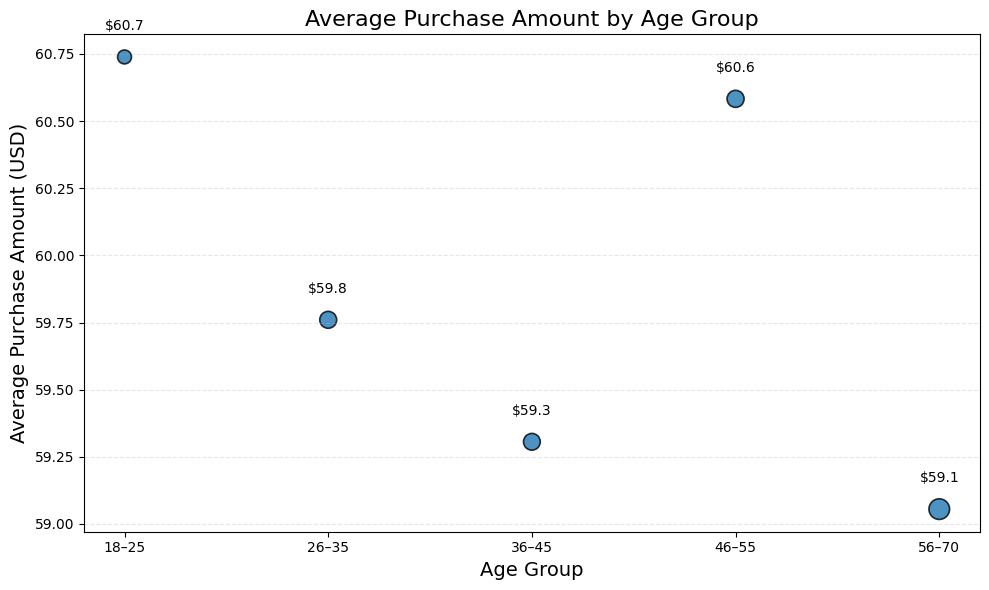

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# ii) Scatter plot: Age Group vs Avg Purchase
sizes = age_group_stats["n_customers"] * 0.2  # you can adjust multiplier

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    age_group_stats["Age Group"],
    age_group_stats["avg_purchase"],
    s=sizes,
    alpha=0.8,
    edgecolor="black",
    linewidth=1.2
)

plt.title("Average Purchase Amount by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Average Purchase Amount (USD)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Label each point
for i, row in age_group_stats.iterrows():
    plt.text(
        row["Age Group"],
        row["avg_purchase"] + 0.1,
        f"${row['avg_purchase']:.1f}",
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [34]:
# iii) Select only numetic data and show heatmap
# For heatmap we will aggregate per Category

cat_df = (
    df.groupby("Category")
      .agg(
          n_customers=("Age", "count"),
          avg_age=("Age", "mean"),
          avg_purchase=("Purchase Amount (USD)", "mean"),
          avg_rating=("Review Rating", "mean"),
          avg_prev_purchases=("Previous Purchases", "mean"),
          sub_rate=("Subscription Status", "mean"),
          discount_rate=("Discount Applied", "mean")
      )
      .reset_index()
)

print("Category-level data:")
print(cat_df.head())

Category-level data:
      Category  n_customers    avg_age  avg_purchase  avg_rating  \
0  Accessories         1240  44.224194     59.838710    3.768629   
1     Clothing         1737  43.782959     60.025331    3.723143   
2     Footwear          599  44.442404     60.255426    3.790651   
3    Outerwear          324  44.311728     57.172840    3.746914   

   avg_prev_purchases  sub_rate  discount_rate  
0           25.725806  0.269355       0.437903  
1           25.199194  0.263097       0.420841  
2           25.232053  0.285476       0.432387  
3           24.956790  0.280864       0.444444  


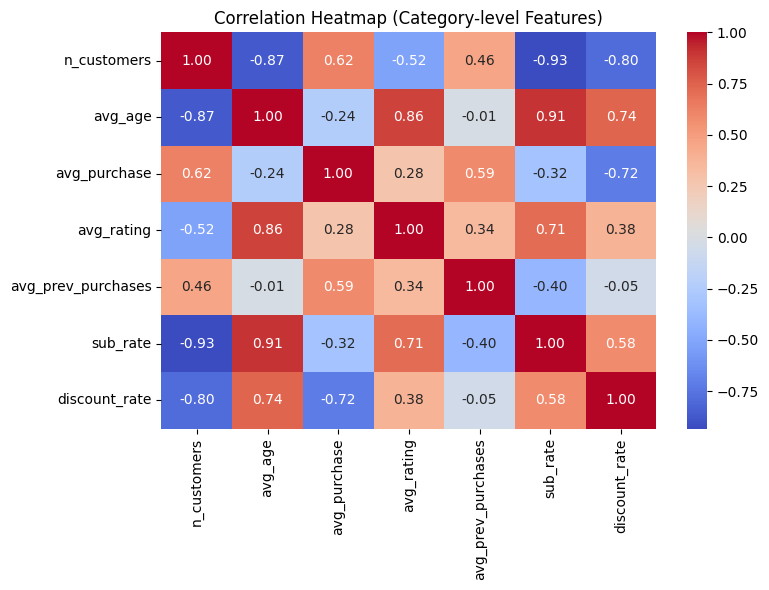

In [35]:
# Correlation Heatmap (Category-level Features)

numeric_cols = cat_df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(8,6))
corr = cat_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Category-level Features)")
plt.tight_layout()
plt.show()


In [38]:
# Clustering
# We will group data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df['Age Group'] = pd.cut(
    df['Age'],
    bins=[18, 25, 35, 45, 55, 70],
    labels=['18–25', '26–35', '36–45', '46–55', '56–70'],
    include_lowest=True
)
grouped = df.groupby("Age Group").agg({
    "Purchase Amount (USD)": "mean",
    "Review Rating": "mean",
    "Previous Purchases": "mean",
    "Subscription Status": "mean",
    "Discount Applied": "mean"
}).reset_index()

grouped.rename(columns={
    "Purchase Amount (USD)": "Avg Purchase",
    "Review Rating": "Avg Rating",
    "Previous Purchases": "Avg Previous",
    "Subscription Status": "Subscription Rate",
    "Discount Applied": "Discount Rate"
}, inplace=True)

print("Grouped Data:")
print(grouped)


Grouped Data:
  Age Group  Avg Purchase  Avg Rating  Avg Previous  Subscription Rate  \
0     18–25     60.647986    3.816287     24.633975           0.262697   
1     26–35     59.760108    3.735175     24.760108           0.264151   
2     36–45     59.305898    3.751029     25.170096           0.263374   
3     46–55     60.583001    3.712085     25.419655           0.304117   
4     56–70     59.055204    3.750679     26.192760           0.258824   

   Discount Rate  
0       0.432574  
1       0.435310  
2       0.414266  
3       0.432935  
4       0.433484  


/tmp/ipython-input-1099847731.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("Age Group").agg({


In [39]:
# Scale numeric features for clustering

X = grouped.drop(columns=["Age Group"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

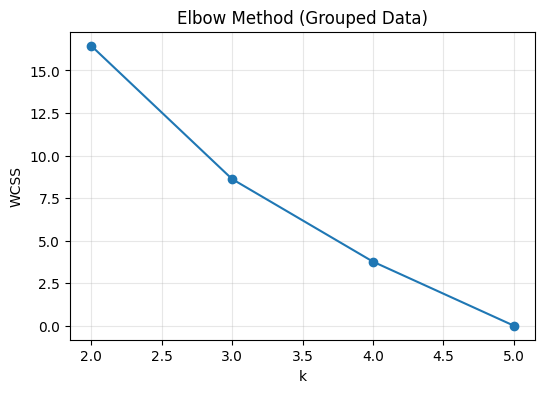

In [41]:
import matplotlib.pyplot as plt

# iv) Elbow method

fwcss = []
# Determine the maximum k based on the number of samples in X_scaled
# X_scaled has 5 samples, so k can go up to 5.
K_range = range(2, X_scaled.shape[0] + 1) # This will be range(2, 6) -> [2, 3, 4, 5]

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X_scaled)
    fwcss.append(kmeans.inertia_) # Correctly append to fwcss

plt.figure(figsize=(6,4))
plt.plot(K_range, fwcss, marker='o') # Plot K_range and fwcss
plt.title("Elbow Method (Grouped Data)")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.grid(alpha=0.3)
plt.show()

In [44]:
# A Silhouette Score
# Adjust K_range for silhouette score to be less than n_samples
# X_scaled has 5 samples, so k can go up to 4.
K_range_silhouette = range(2, X_scaled.shape[0]) # This will be range(2, 5) -> [2, 3, 4]

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k} → silhouette = {score:.3f}")

# Choose best k manually after seeing scores (based on previous outputs, best_k=2 might be chosen)
best_k = 2

kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

grouped["Cluster"] = cluster_labels

print("\nClustered Age Groups:")
print(grouped)

k=2 → silhouette = 0.111
k=3 → silhouette = 0.110
k=4 → silhouette = 0.063

Clustered Age Groups:
  Age Group  Avg Purchase  Avg Rating  Avg Previous  Subscription Rate  \
0     18–25     60.647986    3.816287     24.633975           0.262697   
1     26–35     59.760108    3.735175     24.760108           0.264151   
2     36–45     59.305898    3.751029     25.170096           0.263374   
3     46–55     60.583001    3.712085     25.419655           0.304117   
4     56–70     59.055204    3.750679     26.192760           0.258824   

   Discount Rate  Cluster  
0       0.432574        0  
1       0.435310        0  
2       0.414266        0  
3       0.432935        1  
4       0.433484        0  


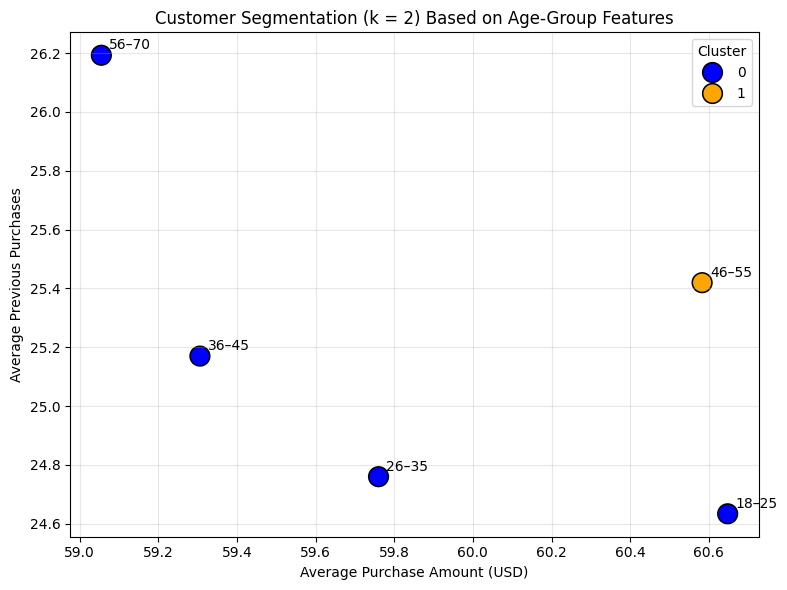

In [48]:
# the best clustering with k = 2

# Use the 'grouped' DataFrame which contains the 'Cluster' column
clustered = grouped.copy()

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=clustered,
    x="Avg Purchase", # Corrected column name
    y="Avg Previous",
    hue="Cluster",
    palette=["blue", "orange"],
    s=200,
    edgecolor="black"
)

# Add labels
for i, row in clustered.iterrows():
    plt.text(
        row["Avg Purchase"] + 0.02, # Corrected column name
        row["Avg Previous"] + 0.02,
        row["Age Group"],
        fontsize=10
    )

plt.xlabel("Average Purchase Amount (USD)")
plt.ylabel("Average Previous Purchases")
plt.title("Customer Segmentation (k = 2) Based on Age-Group Features")
plt.grid(True, alpha=0.3)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

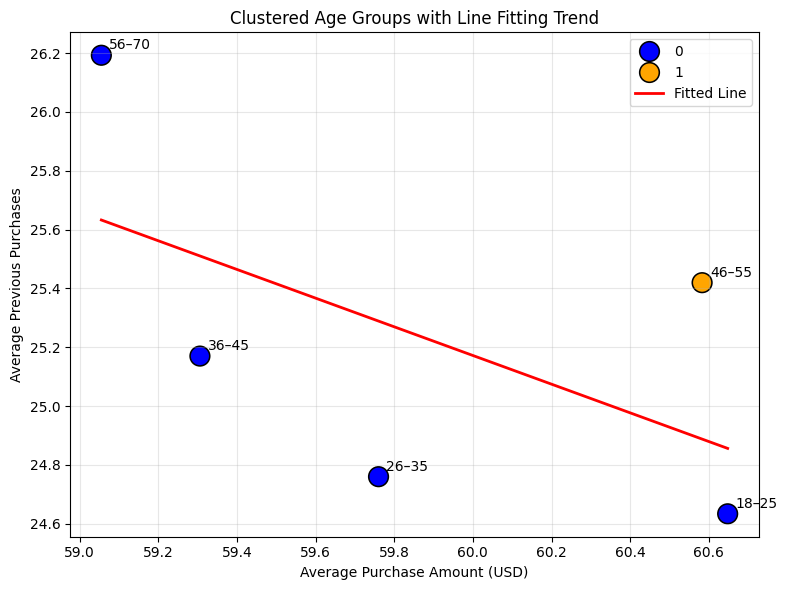

In [50]:
# Line fitting

# Scatter plot + regression line

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Fit regression
X = clustered["Avg Purchase"].values.reshape(-1, 1)
y = clustered["Avg Previous"].values

model = LinearRegression()
model.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=clustered,
    x="Avg Purchase",
    y="Avg Previous",
    hue="Cluster",
    palette=["blue", "orange"],
    s=200,
    edgecolor="black"
)

# Regression line
plt.plot(x_range, y_pred, color="red", linewidth=2, label="Fitted Line")

# Text labels
for i, r in clustered.iterrows():
    plt.text(r["Avg Purchase"]+0.02, r["Avg Previous"]+0.02, r["Age Group"])

plt.xlabel("Average Purchase Amount (USD)")
plt.ylabel("Average Previous Purchases")
plt.title("Clustered Age Groups with Line Fitting Trend")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()